In [27]:
pip uninstall numpy --yes


Found existing installation: numpy 2.1.0
Uninstalling numpy-2.1.0:
  Successfully uninstalled numpy-2.1.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.21.0


  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\pip\_internal\commands\install.py", line 386, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 95, in resolve
    result = self._result = resolver.resol

In [3]:
pip show numpy


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade numba tslearn


   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.6 MB 18.6 MB/s eta 0:00:01
   --------------------- ------------------ 6.8/12.6 MB 19.1 MB/s eta 0:00:01
   ----------------------------------- ---- 11.3/12.6 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 17.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [6]:
def normalize_data(data):
    scaler = TimeSeriesScalerMeanVariance()
    data_normalized = scaler.fit_transform(data.values.reshape((data.shape[0], data.shape[1], 1)))
    return pd.DataFrame(data_normalized.reshape(data_normalized.shape[0], data_normalized.shape[1]), columns=data.columns)


In [7]:
def apply_kmeans_dtw(data_normalized, n_clusters=3):
    kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)
    data_normalized['cluster'] = kmeans_dtw.fit_predict(data_normalized)
    return kmeans_dtw, data_normalized


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(data_normalized, kmeans_dtw, y_label="Valeur", num_labels=10):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    for cluster_id in range(kmeans_dtw.n_clusters):
        cluster_data = data_normalized[data_normalized['cluster'] == cluster_id]
        
        for _, row in cluster_data.iterrows():
            axes[cluster_id // 2, cluster_id % 2].plot(range(24), row[:-1], color='gray', alpha=0.5)

        cluster_mean = cluster_data.iloc[:, :-1].mean().values 
        cluster_center = kmeans_dtw.cluster_centers_[cluster_id]
        axes[cluster_id // 2, cluster_id % 2].plot(range(24), cluster_center.flatten(), color='red', linewidth=3, label=f"Centre {cluster_id}")

        axes[cluster_id // 2, cluster_id % 2].plot(range(24), cluster_mean, color='blue', linewidth=2, linestyle="dashed", label=f"Moyenne {cluster_id}")

        axes[cluster_id // 2, cluster_id % 2].set_title(f"Séries temporelles du Cluster {cluster_id}")
        axes[cluster_id // 2, cluster_id % 2].set_xlabel("Heures")
        axes[cluster_id // 2, cluster_id % 2].set_ylabel(y_label)
        axes[cluster_id // 2, cluster_id % 2].set_yticks(np.linspace(data_normalized.iloc[:, :-1].min().min(), data_normalized.iloc[:, :-1].max().max(), num_labels))
        axes[cluster_id // 2, cluster_id % 2].grid(True)
        axes[cluster_id // 2, cluster_id % 2].legend()

    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()


In [24]:
def plot_clusters(data_normalized, kmeans_dtw, y_label="Valeur", num_labels=10):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    for cluster_id in range(kmeans_dtw.n_clusters):
        cluster_data = data_normalized[data_normalized['cluster'] == cluster_id]

        for idx, row in cluster_data.iterrows():
            axes[cluster_id // 2, cluster_id % 2].plot(range(24), row[:-1], color='gray', alpha=0.5)
        
        cluster_center = kmeans_dtw.cluster_centers_[cluster_id]
        
        axes[cluster_id // 2, cluster_id % 2].plot(range(24), cluster_center.flatten(), color='red', linewidth=3, label=f"Centre du cluster {cluster_id}")
        
        axes[cluster_id // 2, cluster_id % 2].set_title(f"Séries temporelles du Cluster {cluster_id}")
        axes[cluster_id // 2, cluster_id % 2].set_xlabel("Heures")
        axes[cluster_id // 2, cluster_id % 2].set_ylabel(y_label)
        axes[cluster_id // 2, cluster_id % 2].set_yticks(np.linspace(data_normalized.iloc[:, :-1].min().min(), data_normalized.iloc[:, :-1].max().max(), num_labels))
        axes[cluster_id // 2, cluster_id % 2].grid(True)

    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


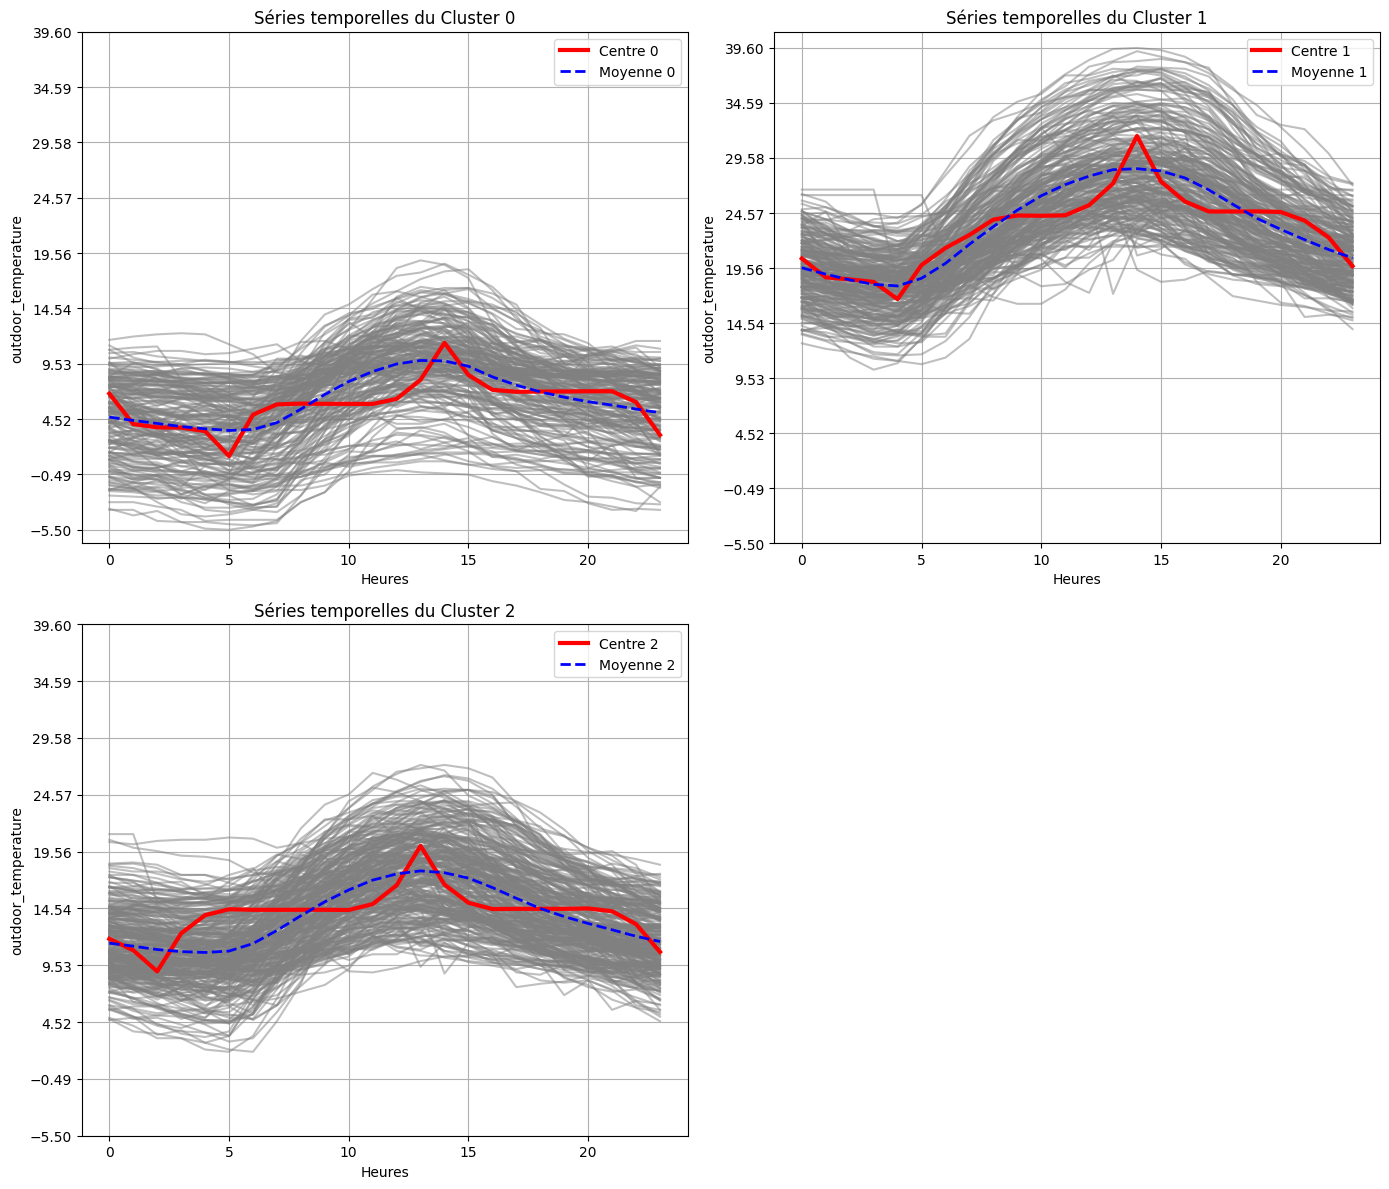

In [9]:
df_temp_out = pd.read_csv('outdoor_temperature.csv')  

#data_normalized = normalize_data(df_temp_out)
kmeans_dtw, data_normalized_with_cluster = apply_kmeans_dtw(df_temp_out, 3)
plot_clusters(data_normalized_with_cluster, kmeans_dtw,"outdoor_temperature")


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


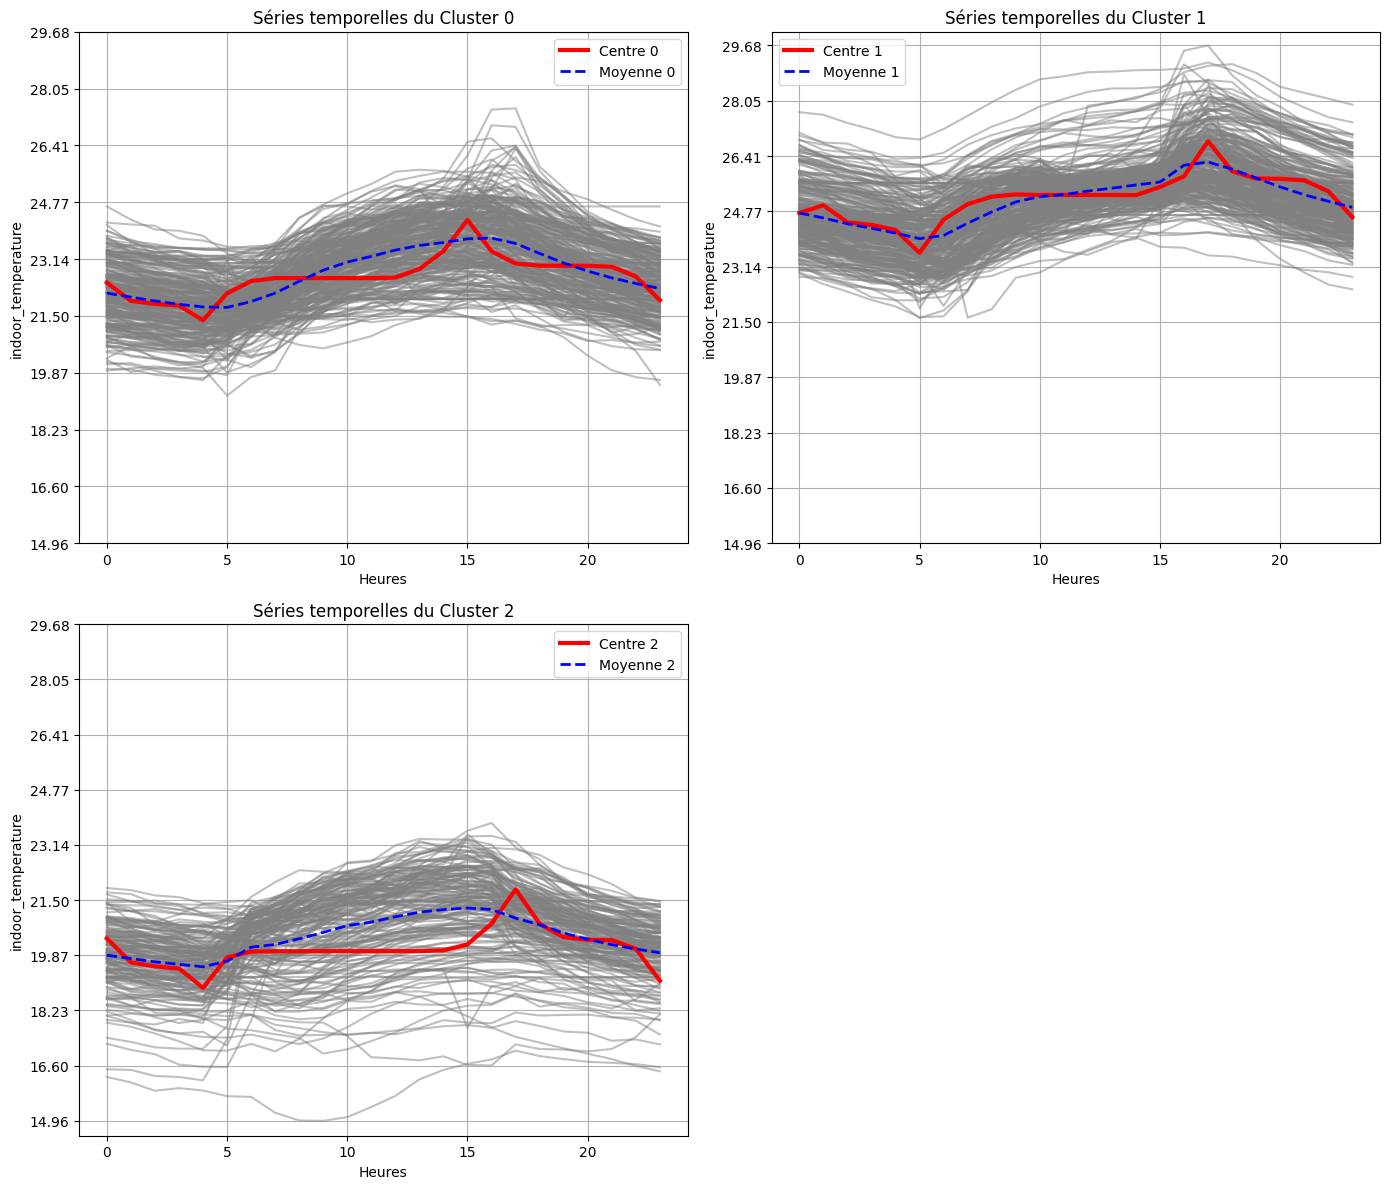

In [10]:
df_temp_in= pd.read_csv('indoor_temperature.csv')  

#data_normalized = normalize_data(df_temp_in)
kmeans_dtw, data_normalized_with_cluster = apply_kmeans_dtw(df_temp_in, 3)
plot_clusters(data_normalized_with_cluster, kmeans_dtw,"indoor_temperature")


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


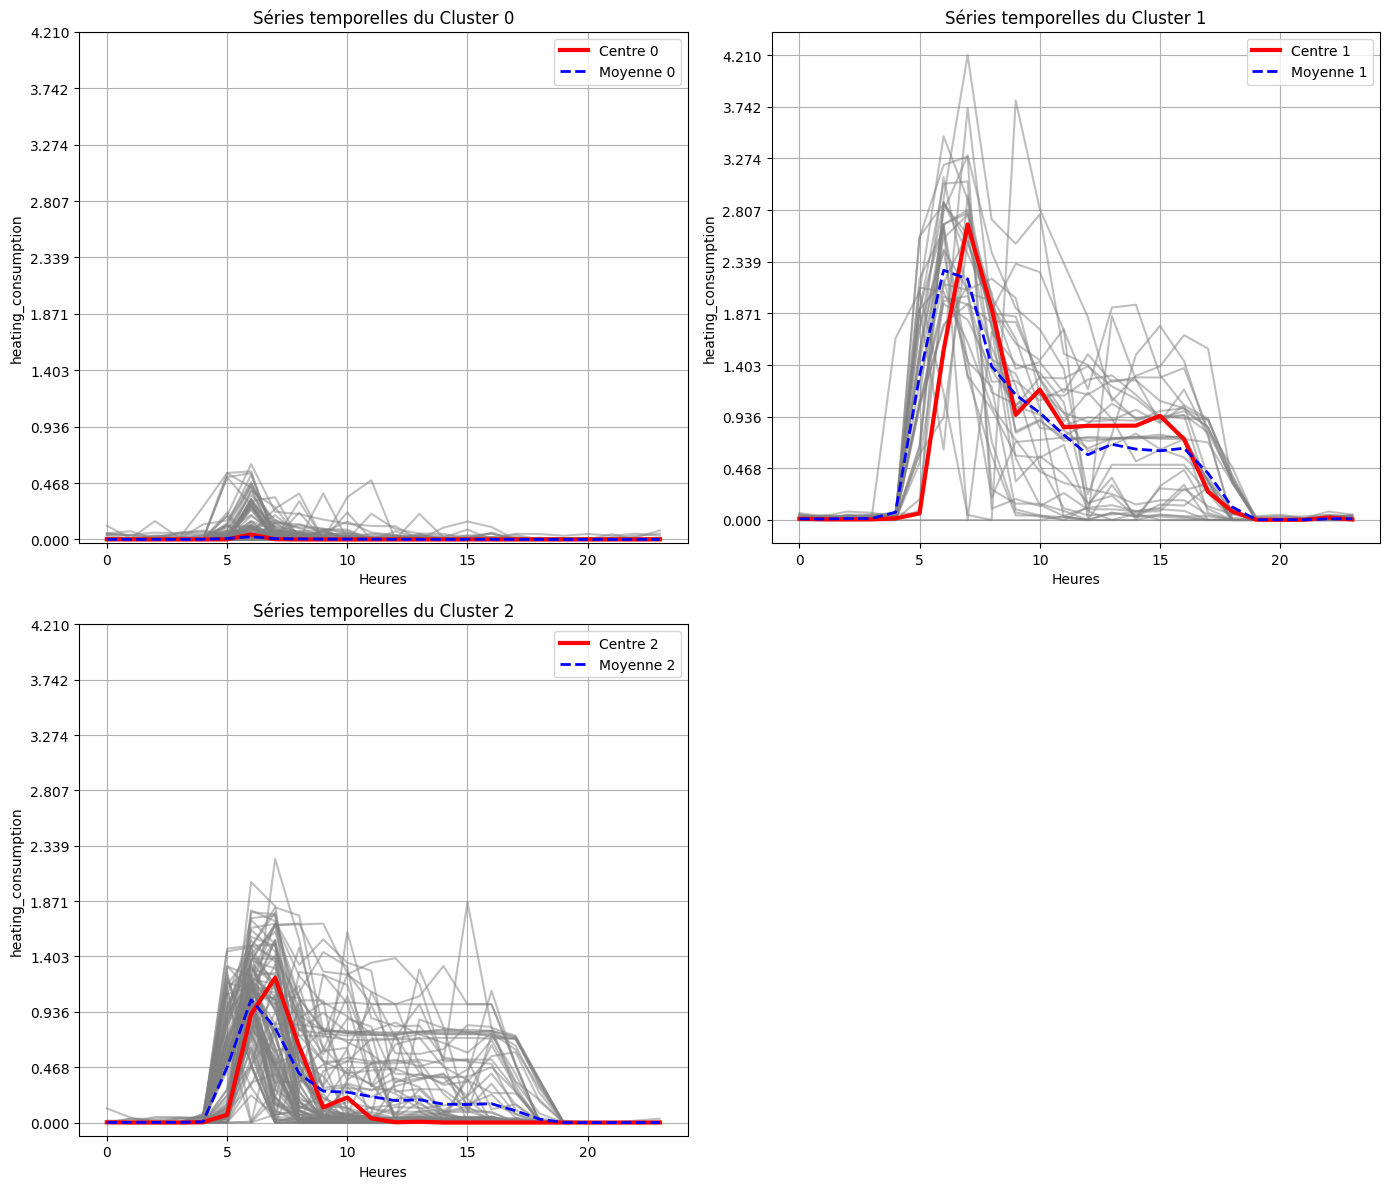

In [11]:
df_heat = pd.read_csv('heating_consumption.csv')  

#data_normalized = normalize_data(df_heat)
kmeans_dtw, data_normalized_with_cluster = apply_kmeans_dtw(df_heat, 3)
plot_clusters(data_normalized_with_cluster, kmeans_dtw,"heating_consumption")
